In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_system(): 
    """System object:
    R: uninfected CD4
    L: latently infected cells
    E: actively infected cells
    V: free virions
    
    Γ: rate of unifected CD4 arising
    τ: proportion activited
    μ: death rate of R
    β: rate of infection of CD4 per virion
    ρ: proportion of latently infected cells among all infected
    α: rate of latently infected cells becoming activited
    δ: death rate of actively infected
    π: production rate of virions by single uninfected cell
    σ: death rate of V

    
    """
    init = State(R = 200 , L = 0, E = 0, V = 4e-7, Total_CD4 = 1000)
    
    t0 = 0
    t_end = 40
    #days
    
    return System(init=init, t0=t0, t_end=t_end, Γ=1.36, τ=0.2, μ=0.00136, β=0.00027, α=0.036, δ=0.33, π=100, σ=2,ρ=0.1,dt=.1)


In [3]:
def plot_fig1(Total_CD4,V):
    """Plot the results of HIV model
    Total_CD4=1000*(1-τ)+R+L+E
    """
    plot(Total_CD4, '-', label='Total CD4')
    plot(V, '--', label='free virions')
    decorate(title='Total CD4 and free-of-cell virions number',
             xlabel='Time (days)',
             ylabel= 'Numbers'   )

In [4]:
def plot_fig2(R,L,E):
    plot(R, '--', label='uninfected')
    plot(L, '--', label='latently infected')
    plot(E, ':', label='actively infected')
    decorate(title='Uninfected, Latently Infected, Actively Infected Cells trends',
             xlabel='Time (days)',
             ylabel= 'Numbers'   )

In [5]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end,dt):
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

In [6]:
linrange(1, 2,0.5)

array([1. , 1.5])

In [7]:
def update_func(state, t, system):
    r, l, e, v, total = state
    unpack(system)
    
#     for i in linrange (1, 2, 1/i)
    uninfectedrise = Γ * τ
    deadR = μ * r
    infecting = β * r * v

    latentinfection = ρ * β * r * v
    deadL = μ * l
    activating = α * l


    activeinfection = (1 - ρ) * β * r * v
    deadE = δ * e



    virionproduction = π * e 
    deadV = σ * v


    r_change= uninfectedrise - deadR - infecting
    l_change= latentinfection - deadL - activating
    e_change= activeinfection - deadE + activating
    v_change= virionproduction - deadV

    r += r_change * dt
    l += l_change * dt
    e += e_change * dt
    v += v_change * dt

    
    total=1000*(1-τ)+r+l+e
    
    
    
    return State(R=r, L=l, E=e, V=v, Total_CD4=total)

In [8]:
system = make_system()
results = run_simulation(system, update_func)

,R,L,E,V,Total_CD4
0.0,200.000000,0.000000e+00,0.000000e+00,4.000000e-07,1000.000000
0.1,200.000000,2.160000e-10,1.944000e-09,3.200000e-07,1000.000000
0.2,200.000000,3.879930e-10,3.435826e-09,2.754400e-07,1000.000000
0.3,200.000000,5.352811e-10,4.662479e-09,2.547103e-07,1000.000000
0.4,200.000000,6.708248e-10,5.748436e-09,2.503930e-07,1000.000000
0.5,200.000000,8.035308e-10,6.778062e-09,2.577987e-07,1000.000000
0.6,200.000000,9.397402e-10,7.810181e-09,2.740196e-07,1000.000000
0.7,200.000000,1.084200e-09,8.887563e-09,2.973175e-07,1000.000000
0.8,200.000000,1.240701e-09,1.004314e-08,3.267296e-07,1000.000000
0.9,200.000000,1.412500e-09,1.130409e-08,3.618151e-07,1000.000000


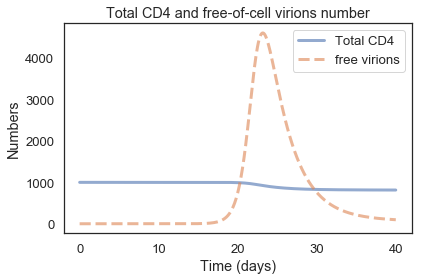

In [9]:
plot_fig1(results.Total_CD4, results.V)

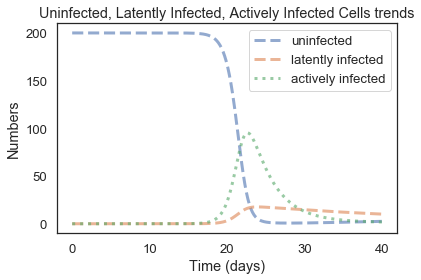

In [10]:
plot_fig2( results.R,results.L, results.E)